In [7]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [8]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('pro_accgyro_training_set.xlsx')
df

,Task_Label,GyroX_ZCR,GyroX_Spectral_Centroid,GyroX_Spectral_Bandwidth,GyroX_Spectral_Flatness,GyroX_Spectral_Rolloff_25,GyroX_Spectral_Rolloff_50,GyroX_Spectral_Rolloff_85,GyroX_RMS,GyroX_Spectral_Kurtosis,...,AccZ_Spectral_Rolloff_85,AccZ_RMS,AccZ_Spectral_Kurtosis,AccZ_Spectral_Skewness,AccZ_Spectral_Entropy,AccZ_Spectral_Variance,AccZ_Spectral_Mean,AccZ_Spectral_Crest,Participant,Classification
0,12.0a,0.414683,230.612467,123.267062,0.318038,130.743512,213.850636,380.735236,0.035689,1.370029,...,430.093022,0.001076,0.348008,0.638555,13.584974,0.009647,0.160822,0.000274,10785,0
1,12.0b,0.412929,229.574505,123.318211,0.315011,129.924192,212.965109,379.998676,0.036098,1.387660,...,430.953721,0.001083,0.094564,0.568576,13.588027,0.009625,0.162448,0.000262,10785,0
2,12.0c,0.408360,228.009533,123.572029,0.312982,127.722789,210.763705,378.335209,0.036047,1.207029,...,431.284759,0.001092,0.144821,0.607381,13.588096,0.009874,0.163459,0.000239,10785,0
3,12.0d,0.408129,229.163427,123.510066,0.312265,129.543498,212.005098,379.841433,0.036052,1.184770,...,429.662672,0.001098,0.329661,0.649654,13.582662,0.010136,0.164157,0.000272,10785,0
4,12.0e,0.408575,229.413478,123.509737,0.310393,129.742121,212.038202,380.040056,0.036002,1.332704,...,430.481991,0.001078,0.356853,0.652239,13.588352,0.009663,0.161347,0.000289,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,85,0.389210,226.687634,124.815372,0.312025,125.388970,208.388506,379.162805,0.036565,1.430590,...,428.859905,0.001175,0.806176,0.744622,13.575815,0.012422,0.178976,0.000298,94527,0
2702,87,0.370390,218.529909,121.540524,0.255776,126.828986,191.820048,367.799921,0.049038,6.049803,...,407.698292,0.002589,13.855738,3.133800,13.331840,0.113360,0.329863,0.000672,94527,1
2703,89,0.389888,226.682353,123.903608,0.302053,127.474510,207.602291,377.954515,0.038061,2.701306,...,427.792307,0.001323,11.005391,2.498372,13.469382,0.027212,0.202672,0.000559,94527,0
2704,91,0.380230,219.709821,121.798807,0.262284,127.234507,195.055945,369.388904,0.047543,13.563744,...,420.054290,0.002128,14.623167,2.645358,13.466717,0.060207,0.300402,0.000794,94527,1


                     Feature  Mutual_Information
81    AccZ_Spectral_Variance            0.518351
77                  AccZ_RMS            0.515564
79    AccZ_Spectral_Skewness            0.502720
82        AccZ_Spectral_Mean            0.491989
78    AccZ_Spectral_Kurtosis            0.482421
73    AccZ_Spectral_Flatness            0.478192
80     AccZ_Spectral_Entropy            0.462324
83       AccZ_Spectral_Crest            0.444641
70                  AccZ_ZCR            0.414293
75  AccZ_Spectral_Rolloff_50            0.384282


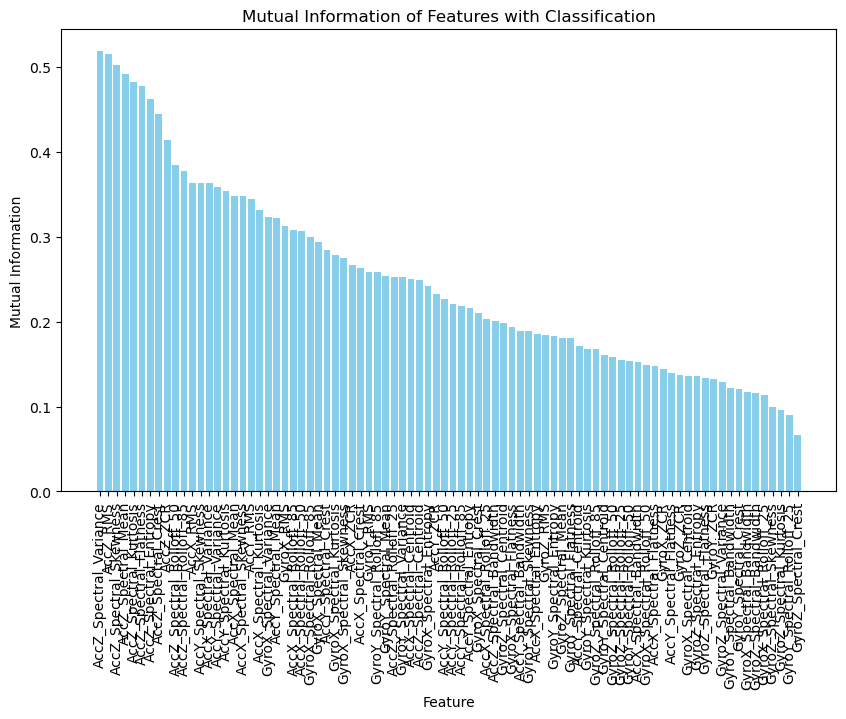

   AccZ_Spectral_Variance  AccZ_RMS  AccZ_Spectral_Skewness  \
0                0.009647  0.001076                0.638555   
1                0.009625  0.001083                0.568576   
2                0.009874  0.001092                0.607381   
3                0.010136  0.001098                0.649654   
4                0.009663  0.001078                0.652239   

   AccZ_Spectral_Mean  AccZ_Spectral_Kurtosis  AccZ_Spectral_Flatness  \
0            0.160822                0.348008                0.344127   
1            0.162448                0.094564                0.345113   
2            0.163459                0.144821                0.345735   
3            0.164157                0.329661                0.340929   
4            0.161347                0.356853                0.346463   

   AccZ_Spectral_Entropy  AccZ_Spectral_Crest  AccZ_ZCR  \
0              13.584974             0.000274  0.527733   
1              13.588027             0.000262  0.525300   
2    

In [9]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [11]:
writer = pd.ExcelWriter('pro_accgyro_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_46257/3857649601.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
